In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import json
import pandas as pd

In [4]:
dataReview = []
with open('yelp_Fall2023/review.json') as f:
    for line in f:
        dataReview.append(json.loads(line))

f.close()

In [5]:
dataBusiness = []
with open('yelp_Fall2023/business.json') as f:
    for line in f:
        dataBusiness.append(json.loads(line))

f.close()

In [58]:
trips_data=pd.read_csv("yelp_Fall2023/Trips_by_Distance.csv")

In [68]:
trips_data.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [66]:
trips_data.loc[trips_data['State Postal Code']=='PA']['County Name'].unique()

array([nan, 'Adams County', 'Allegheny County', 'Armstrong County',
       'Beaver County', 'Bedford County', 'Berks County', 'Blair County',
       'Bradford County', 'Bucks County', 'Butler County',
       'Cambria County', 'Cameron County', 'Carbon County',
       'Centre County', 'Chester County', 'Clarion County',
       'Clearfield County', 'Clinton County', 'Columbia County',
       'Crawford County', 'Cumberland County', 'Dauphin County',
       'Delaware County', 'Elk County', 'Erie County', 'Fayette County',
       'Forest County', 'Franklin County', 'Fulton County',
       'Greene County', 'Huntingdon County', 'Indiana County',
       'Jefferson County', 'Juniata County', 'Lackawanna County',
       'Lancaster County', 'Lawrence County', 'Lebanon County',
       'Lehigh County', 'Luzerne County', 'Lycoming County',
       'McKean County', 'Mercer County', 'Mifflin County',
       'Monroe County', 'Montgomery County', 'Montour County',
       'Northampton County', 'Northumber

In [67]:
trips_data.loc[trips_data['State Postal Code']=='IN']['County Name'].unique()

array([nan, 'Whitley County', 'White County', 'Wells County',
       'Wayne County', 'Washington County', 'Warrick County',
       'Warren County', 'Wabash County', 'Vigo County',
       'Vermillion County', 'Vanderburgh County', 'Union County',
       'Tipton County', 'Tippecanoe County', 'Switzerland County',
       'Sullivan County', 'Steuben County', 'Starke County',
       'Spencer County', 'Shelby County', 'Scott County',
       'St. Joseph County', 'Rush County', 'Ripley County',
       'Randolph County', 'Putnam County', 'Pulaski County',
       'Posey County', 'Porter County', 'Pike County', 'Perry County',
       'Parke County', 'Owen County', 'Orange County', 'Ohio County',
       'Noble County', 'Newton County', 'Morgan County',
       'Montgomery County', 'Monroe County', 'Miami County',
       'Martin County', 'Marshall County', 'Marion County',
       'Madison County', 'Lawrence County', 'LaPorte County',
       'Lake County', 'LaGrange County', 'Kosciusko County',
     

In [6]:
# Converting the json data into a Pandas df
dataBusiness = pd.DataFrame(dataBusiness)
dataReview = pd.DataFrame(dataReview)

# Getting column names 
print(dataBusiness.columns)
print(dataReview.columns)
len(dataBusiness['name'].unique())

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


114117

In [87]:
dataBusiness.loc[dataBusiness['business_id']=='Pns2l4eNsfO8kk83dixA6A']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [8]:
dataReview.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
dataBusiness.columnss

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [11]:
# Basic data descriptioin of Business Data 
dataBusiness.isnull().sum().sort_values(ascending=False)

hours           23223
attributes      13744
categories        103
business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
dtype: int64

In [12]:
dataBusiness.city.value_counts()

Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: city, Length: 1416, dtype: int64

In [13]:
dataBusiness.categories

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [36]:
dataBusiness.dropna(subset=['categories'], inplace=True)
breweries = dataBusiness[dataBusiness.categories.str.contains("Brew")]

In [37]:
breweries.shape

(889, 14)

In [90]:
# keywords related to breweries
brewery_keywords = ['brewery', 'brewpub', 'breweries', 'brew house', 'alehouse', 'beer garden', 'beerhouse', 'biergarten']


In [91]:
# Use the str.contains() method with case insensitive search to filter the data
breweries_df = dataBusiness[dataBusiness['categories'].str.contains("Brew|Brewery|Brewpub|Breweries|Brew House|Alehouse|Beer Garden|Beerhouse|Biergarten", case=False, na=False)]


In [92]:
print(breweries_df)

                   business_id                          name  \
4       mWMc6_wTdE0EUBKIGXDVfA      Perkiomen Valley Brewery   
35      aPNXGTDkf-4bjhyMBQxqpQ                    Craft Hall   
81      7clCBgNbd-x2Wj96lZ6Mjw     Bier Brewery and Tap Room   
112     sB45WFgysT617bKWP_WJwA  Budweiser Brewery Experience   
389     cDekcTE1qwpz8ROlYixhqg   Philly Homebrew Outlet East   
...                        ...                           ...   
149821  ePQcZirx5-hZocoMs8aqNg             Eight & Sand Beer   
150021  3BOurhEZ_kNhZ7Rrfpi0BA    Blackstone Brewing Company   
150031  qiWD-qUrHYJ7xRHla68xiQ    Ram Restaurant & Brewhouse   
150150  nTEmSvz8_DK-iK3miQFCwA           Great Basin Brewing   
150198  lIZ2JghGs8dJ2HF85-3N0A    Swedesboro Brewing Company   

                     address          city state postal_code   latitude  \
4              101 Walnut St    Green Lane    PA       18054  40.338183   
35        901 N Delaware Ave  Philadelphia    PA       19123  39.962582   
81    

In [93]:
brewery_counts_by_city = breweries_df.groupby('city')['business_id'].nunique()


# Filter out cities with less than 10 breweries
brewery_counts_by_city = brewery_counts_by_city[brewery_counts_by_city >= 10]


In [94]:
brewery_counts_by_city_sorted = brewery_counts_by_city.sort_values(ascending=False)

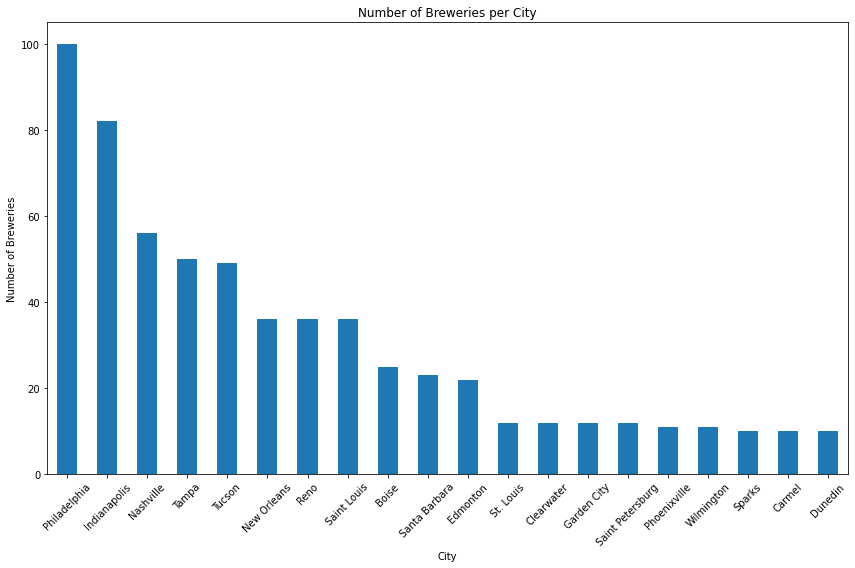

In [95]:
# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size of the figure as needed
brewery_counts_by_city_sorted.plot(kind='bar')

plt.title('Number of Breweries per City')
plt.xlabel('City')
plt.ylabel('Number of Breweries')
plt.xticks(rotation=45)  # Rotate the x labels so they don't overlap

# Show the plot
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

In [96]:
## check whether has duplicated business id
breweries_df.business_id.duplicated().sum()

0

In [97]:
breweries_df.isnull().sum()

business_id      0
name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
attributes       7
categories       0
hours           64
dtype: int64

In [41]:
##  Checking the missing values from review data before merging 
dataReview.isnull().sum()


review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [98]:
breweries_df_new=breweries_df[breweries_df['city'].isin(['Indianapolis', 'Philadelphia'])]

In [99]:
breweries_df_new.shape

(182, 14)

In [100]:
data_indi=breweries_df_new[breweries_df_new['city'] == 'Indianapolis']

In [101]:
data_philly=breweries_df_new[breweries_df_new['city'] == 'Philadelphia']

In [105]:
data_indi

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
81,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,139,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Beer, Wine & Spirits, Breweries","{'Tuesday': '15:0-21:0', 'Wednesday': '15:0-21..."
636,HCbJPXWXvwN-C7XfmVy3gA,Granite City Food & Brewery,"49 W Maryland St, Ste B03A",Indianapolis,IN,46204,39.766420,-86.159245,3.5,258,0,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Desserts, Breweries, Breakfast & Brunch, Resta...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-0:0',..."
3037,jnZYD2UCGziWwGsUxybkFw,Daredevil Hall,"2721 E 86th St, Ste 180",Indianapolis,IN,46240,39.911917,-86.118476,4.0,184,1,"{'RestaurantsTableService': 'True', 'Wheelchai...","Brewpubs, Restaurants, Breweries, Beer Bar, Am...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
3795,iHV3uBo1N9ETBtuEqdDsWQ,Sun King Broad Ripple,1021 Broad Ripple Ave,Indianapolis,IN,46220,39.869321,-86.140748,4.0,97,0,"{'Smoking': 'u'no'', 'BusinessParking': '{'gar...","Food, Beer Bar, Pubs, Breweries, American (New...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
4673,JJNCJWaH2KV44r9aeEBlqA,Indiana City Brewing,24 Shelby St,Indianapolis,IN,46202,39.765963,-86.141108,4.0,153,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Breweries, Beer, Wine & Spirits, Food","{'Wednesday': '16:0-20:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140001,d87V_gH3I1EaGWOM_EYRXw,Books & Brews - Mass Ave.,643 Massachusetts Ave,Indianapolis,IN,46204,39.776012,-86.147293,3.5,28,0,"{'BusinessParking': '{'garage': False, 'street...","Used Bookstore, Brewpubs, Shopping, Breweries,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
142755,h0vaA8cPdjabzotwa6BsyA,Scarlet Lane Brewing Gastropub,1702 Bellefontaine St,Indianapolis,IN,46202,39.790401,-86.142466,4.5,116,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Salad, Gastropubs, Food, Brewerie...","{'Tuesday': '15:0-22:0', 'Wednesday': '15:0-22..."
144172,JydmOKf-8Plo13Idj33Iyw,Round Town Brewery,"950 S White River Parkway West Dr, Ste 100",Indianapolis,IN,46221,39.755351,-86.177004,4.5,37,0,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Breweries","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."
145571,SYffIaST3GI1FNXk9A_uwg,Upland Brewing - Fountain Square,1201 Prospect St,Indianapolis,IN,46203,39.751974,-86.138049,4.0,136,1,"{'HasTV': 'True', 'HappyHour': 'False', 'ByApp...","Breweries, Brewpubs, Food, Bars, American (Tra...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [110]:
from sklearn.preprocessing import MinMaxScaler


In [111]:
scaler=MinMaxScaler()

In [112]:
data_indi['review_count_standard'] = scaler.fit_transform(data_indi[['review_count']])


/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/3468476788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indi['review_count_standard'] = scaler.fit_transform(data_indi[['review_count']])


In [113]:
data_indi.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,review_count_standard
81,7clCBgNbd-x2Wj96lZ6Mjw,Bier Brewery and Tap Room,5133 E 65th St,Indianapolis,IN,46220,39.875532,-86.082857,4.5,139,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Beer, Wine & Spirits, Breweries","{'Tuesday': '15:0-21:0', 'Wednesday': '15:0-21...",0.215088
636,HCbJPXWXvwN-C7XfmVy3gA,Granite City Food & Brewery,"49 W Maryland St, Ste B03A",Indianapolis,IN,46204,39.766420,-86.159245,3.5,258,0,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Desserts, Breweries, Breakfast & Brunch, Resta...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-0:0',...",0.406100
3037,jnZYD2UCGziWwGsUxybkFw,Daredevil Hall,"2721 E 86th St, Ste 180",Indianapolis,IN,46240,39.911917,-86.118476,4.0,184,1,"{'RestaurantsTableService': 'True', 'Wheelchai...","Brewpubs, Restaurants, Breweries, Beer Bar, Am...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",0.287319
3795,iHV3uBo1N9ETBtuEqdDsWQ,Sun King Broad Ripple,1021 Broad Ripple Ave,Indianapolis,IN,46220,39.869321,-86.140748,4.0,97,0,"{'Smoking': 'u'no'', 'BusinessParking': '{'gar...","Food, Beer Bar, Pubs, Breweries, American (New...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ...",0.147673
4673,JJNCJWaH2KV44r9aeEBlqA,Indiana City Brewing,24 Shelby St,Indianapolis,IN,46202,39.765963,-86.141108,4.0,153,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Breweries, Beer, Wine & Spirits, Food","{'Wednesday': '16:0-20:0', 'Thursday': '16:0-2...",0.237560


In [114]:
data_philly['review_count_standard'] = scaler.fit_transform(data_philly[['review_count']])

/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/1655953440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_philly['review_count_standard'] = scaler.fit_transform(data_philly[['review_count']])


In [115]:
data_philly.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,review_count_standard
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'...",0.053763
389,cDekcTE1qwpz8ROlYixhqg,Philly Homebrew Outlet East,1447 N American St,Philadelphia,PA,19122,39.973681,-75.139648,5.0,32,0,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...","Shopping, Food, Arts & Entertainment, Wholesal...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",0.024194
1106,NQSnr4RPUScss607oxOaqw,Chase's Hop Shop,7235 Rising Sun Ave,Philadelphia,PA,19111,40.060386,-75.084590,4.5,116,1,"{'RestaurantsReservations': 'False', 'Alcohol'...","Chicken Wings, Nightlife, Bars, Delis, Food, B...","{'Monday': '0:0-0:0', 'Tuesday': '13:15-20:30'...",0.099462
3253,ShYwqkUf7PkI7LHqCyTmEA,PHS Pop Up Garden - uCity Square,36th & Filbert St,Philadelphia,PA,19104,39.957088,-75.194128,4.0,13,0,"{'Alcohol': 'u'full_bar'', 'RestaurantsPriceRa...","Beer Gardens, Nightlife","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",0.007168
4306,dO4iyNK2KzLMe1kXLCskbw,St. Declan's Well,3131 Walnut St,Philadelphia,PA,19104,39.952126,-75.186438,3.5,30,0,"{'OutdoorSeating': 'False', 'WiFi': 'u'free'',...","Nightlife, Music Venues, Irish, Pubs, Irish Pu...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",0.022401


In [116]:
## merge business table and review table
indi_breweries_review = pd.merge(data_indi, dataReview, on = 'business_id')


In [118]:
indi_breweries_review.shape

(13364, 23)

In [119]:
philly_breweries_review = pd.merge(data_philly, dataReview, on = 'business_id')

### Choosing the two cities with maximum Breweries in our use case its Indianapolis and Philadelphia

In [54]:
df_filtered.shape 

(28411, 22)

In [53]:
df_filtered['business_id'].nunique()

182

### Given we have 182 breweries in our data set Indianapolis : 82 , Philadelphia : 100 

####  Way to visualise the review count first based on cities and then individually in someway so it make sense and can be used for certain analysis  

In [120]:
## update column names
indi_breweries_review.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

## add column of number of words in review and label of negative and postive reviews
indi_breweries_review['num_words_review'] = df_filtered.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))
    

/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/2638943133.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  indi_breweries_review['num_words_review'] = df_filtered.text.str.replace('\n',''). \


In [121]:
## update column names
philly_breweries_review.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

## add column of number of words in review and label of negative and postive reviews
philly_breweries_review['num_words_review'] = df_filtered.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))
    

/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/3589495186.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  philly_breweries_review['num_words_review'] = df_filtered.text.str.replace('\n',''). \


In [122]:
indi_breweries_review.reset_index()
philly_breweries_review.reset_index()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,avg_star,...,review_count_standard,review_id,user_id,review_star,useful,funny,cool,text,date,num_words_review
0,0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,...,0.053763,sQMYwwfj5tggxisUZXwgkA,KGEdaKlPI-Sv2K_pa2HKgg,4.0,0,0,0,This is a great place to take guests visiting ...,2019-07-22 22:48:30,NaN
1,1,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,...,0.053763,c09IhAED9khTlK1Nw4Wf9A,kauJmG3ZiA-m5u0nPrjb4g,3.0,2,0,1,"As a bar, this place has almost everything you...",2019-06-25 15:55:26,NaN
2,2,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,...,0.053763,1FIFzSnwuyGw0V0a75-1Nw,i8FUZZFocxs24W9FYrGRDQ,5.0,0,0,0,First time here and it is great! Huge open spa...,2019-03-29 23:11:14,NaN
3,3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,...,0.053763,5-YovLQWy6Srq0UnTdVhuw,BqJWbbmEiefT9c4u9Nj8BQ,5.0,0,0,0,Awesome place for families with kids under 8. ...,2019-04-13 18:44:14,NaN
4,4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,...,0.053763,M-38wpRyPVRT35MgRmLCjQ,Ddd0ZKIFQd_NYqclMXYFKw,5.0,0,0,0,"The BEST new addition, especially for families...",2019-05-13 01:56:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15042,15042,P0LuuY4gbVRWhUQ1wa6BrA,Fishtown Brewpub,1101 Frankford Ave,Philadelphia,PA,19125,39.967725,-75.134025,3.5,...,0.080645,Vx76HCmIKJgpL_ju3qDP9w,ET8n-r7glWYqZhuR6GcdNw,2.0,26,3,6,My experience at Fishtown Brewpub last weekend...,2017-08-28 16:23:08,194.0
15043,15043,P0LuuY4gbVRWhUQ1wa6BrA,Fishtown Brewpub,1101 Frankford Ave,Philadelphia,PA,19125,39.967725,-75.134025,3.5,...,0.080645,yjpuDZGJxft5mkfeJvcyHA,0RX9w878R80Ok5iPrNBv3g,5.0,0,0,0,This past Sunday we stopped at Fishtown Brewpu...,2018-07-25 12:56:14,282.0
15044,15044,P0LuuY4gbVRWhUQ1wa6BrA,Fishtown Brewpub,1101 Frankford Ave,Philadelphia,PA,19125,39.967725,-75.134025,3.5,...,0.080645,aojbR0b7oxc4-p3VkLLKqA,_T7ZInXEP0MxIqsQx0IhhQ,3.0,1,0,0,"Place is nice, clean . Service could be a litt...",2017-10-14 05:38:04,154.0
15045,15045,P0LuuY4gbVRWhUQ1wa6BrA,Fishtown Brewpub,1101 Frankford Ave,Philadelphia,PA,19125,39.967725,-75.134025,3.5,...,0.080645,Y9XLltKokSXMRybBq-9EAw,q-gbZrtxbSb7r-EJIqAXFA,4.0,1,0,2,"Stopped here with some friends, place was kind...",2019-03-21 23:10:18,329.0


In [123]:
import ast

# Function to convert string representation of a dictionary to a dictionary
def str_to_dict(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return s



In [80]:
philly_breweries_review['attributes'] = philly_breweries_review['attributes'].apply(str_to_dict)
indi_breweries_review['attributes'] = indi_breweries_review['attributes'].apply(str_to_dict)



/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/743064579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['attributes'] = df_filtered['attributes'].apply(str_to_dict)


In [125]:

indi_attributes_expanded = indi_breweries_review['attributes'].apply(pd.Series)


indi_df_final = indi_breweries_review.drop('attributes', axis=1).join(philly_attributes_expanded)


print(indi_df_final.shape)


(13364, 56)


In [124]:

philly_attributes_expanded = philly_breweries_review['attributes'].apply(pd.Series)


philly_df_final = philly_breweries_review.drop('attributes', axis=1).join(philly_attributes_expanded)


print(philly_df_final.shape)


/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/1675868030.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  philly_attributes_expanded = philly_breweries_review['attributes'].apply(pd.Series)
/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/1675868030.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  philly_attributes_expanded = philly_breweries_review['attributes'].apply(pd.Series)
/var/folders/1v/yzptk_9971x060dvwnyg9b240000gn/T/ipykernel_3823/1675868030.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  philly_attributes_expanded = philly_breweries_review['attributes'].apply(pd.Series)
/var/folders/1v/

(15047, 56)


In [126]:
indi_df_final.to_csv('indi_beer_data.csv')
philly_df_final.to_csv('philly_beer_data.csv')